In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [82]:
import seaborn as sns
import statsmodels.api as st

In [18]:
firearms_df = pd.read_csv('World firearms murders and ownership - Sheet 1.csv')

In [19]:
guns_df = pd.read_csv('data-pvLFI.csv')

In [124]:
population_df = pd.read_csv('population.csv')

In [128]:
population_df.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0


In [135]:
population_2012_df = population_df[['Country Name','2012']].copy()

In [136]:
population_2012_df.head(2)

,Country Name,2012
0,Aruba,102577.0
1,Afghanistan,30696958.0


In [20]:
firearms_df.columns

Index([u'Country/Territory', u'ISO code', u'Source',
       u'% of homicides by firearm', u'Number of homicides by firearm',
       u'Homicide by firearm rate per 100,000 pop',
       u'Rank by rate of ownership', u'Average firearms per 100 people',
       u'Average total all civilian firearms'],
      dtype='object')

In [21]:
guns_df.columns

Index([u'Country', u'Guns/100 inhabitants', u'Number of mass shootings'], dtype='object')

In [24]:
firearms_df = firearms_df.merge(guns_df,left_on='Country/Territory',right_on='Country')

In [25]:
firearms_df.head(2)

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,Australia,15.0,4
1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,Austria,30.4,1


In [54]:
firearms_df['color'] = "blue"

In [58]:
firearms_df.color[firearms_df['Country'] == 'United States'] = "red"

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [138]:
firearms_df = firearms_df.merge(population_2012_df,left_on='Country/Territory',right_on='Country Name')

In [139]:
firearms_df.columns

Index([u'Country/Territory', u'ISO code', u'Source',
       u'% of homicides by firearm', u'Number of homicides by firearm',
       u'Homicide by firearm rate per 100,000 pop',
       u'Rank by rate of ownership', u'Average firearms per 100 people',
       u'Average total all civilian firearms', u'Country',
       u'Guns/100 inhabitants', u'Number of mass shootings', u'color',
       u'Country Name', u'2012'],
      dtype='object')

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color

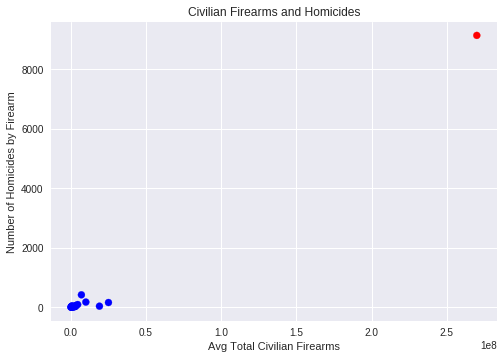

In [140]:
fig, ax = pl.subplots()
fig = figsize(12,8)
ax.scatter(firearms_df['Average total all civilian firearms'],firearms_df['Number of homicides by firearm'],
           c=firearms_df['color'])
pl.xlabel("Avg Total Civilian Firearms")
pl.ylabel("Number of Homicides by Firearm")
pl.title("Civilian Firearms and Homicides")

### [Figure 1: Number of Civilian Firearms and Homicides]

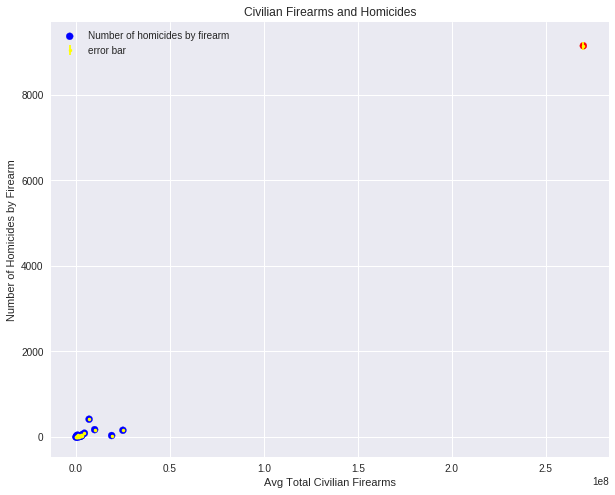

In [144]:
fig, ax = pl.subplots()
fig = figsize(10,8)
ax.scatter(firearms_df['Average total all civilian firearms'],firearms_df['Number of homicides by firearm'],
           c=firearms_df['color'])
e = pl.errorbar(firearms_df['Average total all civilian firearms'],
                firearms_df['Number of homicides by firearm'],
                yerr=np.sqrt(firearms_df['Number of homicides by firearm'] * 1.0),fmt='.',c='yellow',
                label='error bar')
pl.xlabel("Avg Total Civilian Firearms")
pl.ylabel("Number of Homicides by Firearm")
pl.title("Civilian Firearms and Homicides")
pl.legend()

### [Figure 2: Number of Civilian Firearms and Homicides with error bars]

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color

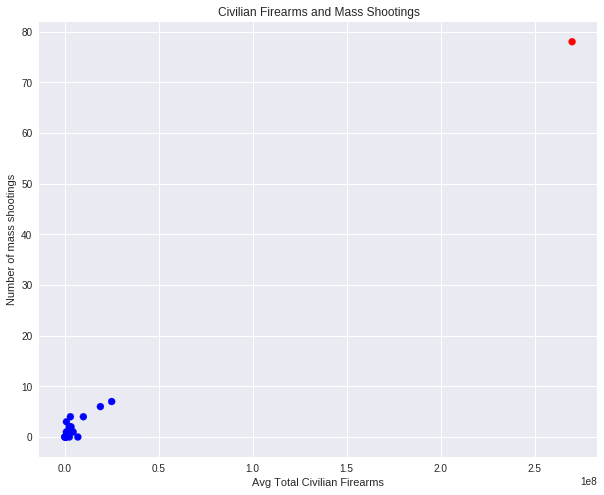

In [145]:
fig, ax = pl.subplots()
fig = figsize(12,8)
ax.scatter(firearms_df['Average total all civilian firearms'],firearms_df['Number of mass shootings'],
           c=firearms_df['color'])
pl.xlabel("Avg Total Civilian Firearms")
pl.ylabel("Number of mass shootings")
pl.title("Civilian Firearms and Mass Shootings")

### [Figure 3: Number of Civilian Firearms and Mass Shootings]

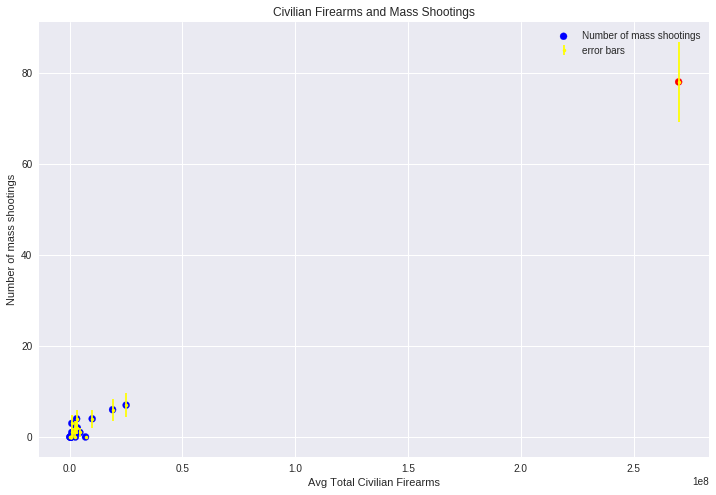

In [147]:
fig, ax = pl.subplots()
fig = figsize(12,8)
ax.scatter(firearms_df['Average total all civilian firearms'],firearms_df['Number of mass shootings'],
           c=firearms_df['color'])
pl.errorbar(firearms_df['Average total all civilian firearms'],firearms_df['Number of mass shootings'],
           yerr=np.sqrt(firearms_df['Number of mass shootings']*1.0),fmt='.',c='yellow',label='error bars')
pl.xlabel("Avg Total Civilian Firearms")
pl.ylabel("Number of mass shootings")
pl.title("Civilian Firearms and Mass Shootings")
pl.legend()

### [Figure 4: Number of Civilian Firearms and Mass Shootings with error bars]

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 

In [159]:
mass_shooting_scaled = (firearms_df['Number of mass shootings']/firearms_df['2012'] * 1e3)/(1e-4)

In [150]:
civilian_firearams_scaled = firearms_df['Average total all civilian firearms']/firearms_df['2012']

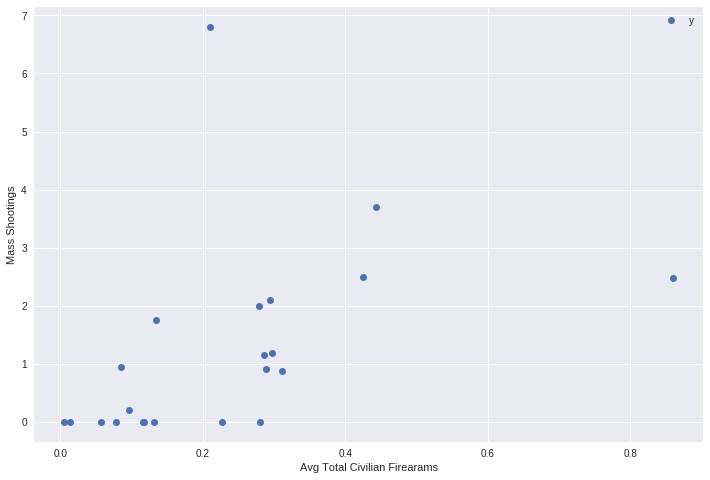

In [160]:
pl.plot(civilian_firearams_scaled, mass_shooting_scaled,'o', label='y')
pl.xlabel('Avg Total Civilian Firearams')
pl.ylabel('Mass Shootings')
pl.legend()

In [164]:
model_ols = st.OLS(endog=mass_shooting_scaled, exog=civilian_firearams_scaled).fit()

In [165]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     19.31
Date:                Wed, 18 Oct 2017   Prob (F-statistic):           0.000253
Time:                        15:09:58   Log-Likelihood:                -39.436
No. Observations:                  22   AIC:                             80.87
Df Residuals:                      21   BIC:                             81.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             4.7479      1.081      4.394      0.000         2.501     6.995
==============================================================================
Omnibus:                       33.992   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.045
Skew:                           2.646   Prob(JB):                     3.41e-19
Kurtosis:                      11.048   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

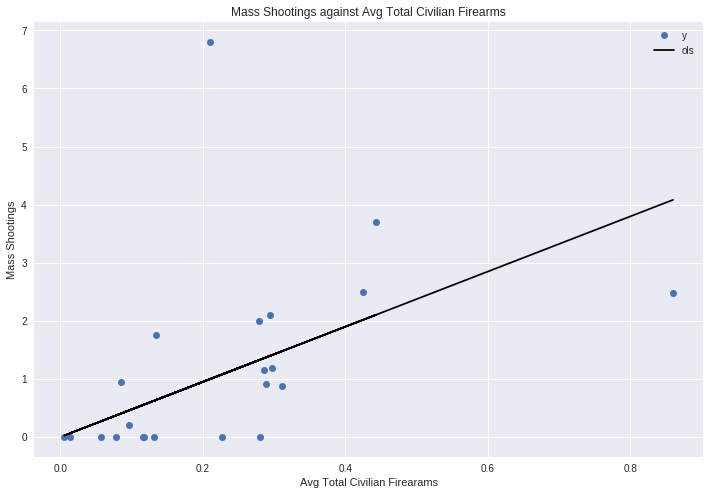

In [169]:
p1 = pl.plot(civilian_firearams_scaled, mass_shooting_scaled,'o',label='y')
p2 = pl.plot(civilian_firearams_scaled, model_ols.predict(),'b-',color='black',label='ols')
pl.xlabel('Avg Total Civilian Firearams')
pl.ylabel('Mass Shootings')
pl.title('Mass Shootings against Avg Total Civilian Firearms')
pl.legend()

### [Figure 5: Number of Civilian Firearms and Mass Shootings using OLS]

In [166]:
model_wls = st.WLS(endog=mass_shooting_scaled, exog=civilian_firearams_scaled).fit()

In [167]:
model_wls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.479
Model:                            WLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     19.31
Date:                Wed, 18 Oct 2017   Prob (F-statistic):           0.000253
Time:                        15:10:08   Log-Likelihood:                -39.436
No. Observations:                  22   AIC:                             80.87
Df Residuals:                      21   BIC:                             81.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             4.7479      1.081      4.394      0.000         2.501     6.995
==============================================================================
Omnibus:                       33.992   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.045
Skew:                           2.646   Prob(JB):                     3.41e-19
Kurtosis:                      11.048   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

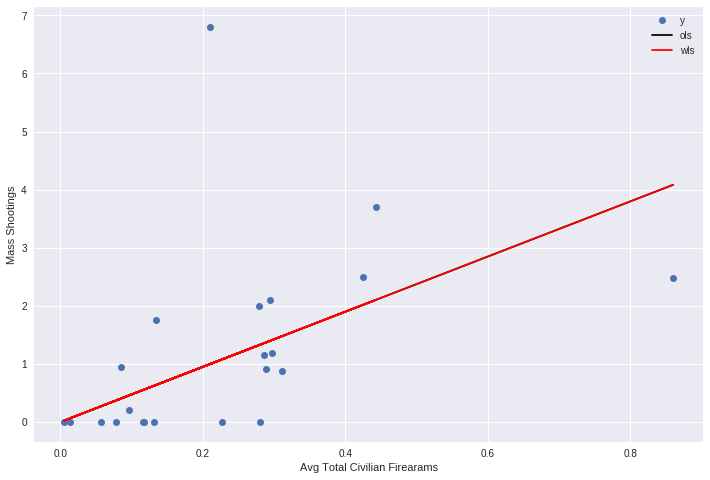

In [168]:
p1 = pl.plot(civilian_firearams_scaled, mass_shooting_scaled,'o',label='y')
p2 = pl.plot(civilian_firearams_scaled, model_ols.predict(),'b-',color='black',label='ols')
p3 = pl.plot(civilian_firearams_scaled, model_wls.predict(),'b-',color='red',label='wls')
pl.xlabel('Avg Total Civilian Firearams')
pl.ylabel('Mass Shootings')
pl.legend()

### [Figure 6: Number of Civilian Firearms and Mass Shootings using OLS and WLS]

In [181]:
df_polyfit = np.polyfit(civilian_firearams_scaled,mass_shooting_scaled,deg=2)

In [182]:
df_polyfit

array([-6.48098166,  8.89684746, -0.26871604])

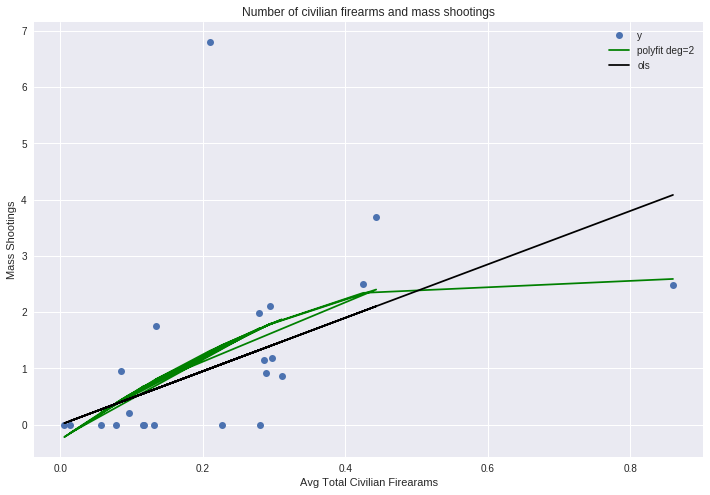

In [192]:
p1 = pl.plot(civilian_firearams_scaled, mass_shooting_scaled,'o',label='y')
pl.plot(civilian_firearams_scaled, civilian_firearams_scaled**2 * df_polyfit[0]+
        civilian_firearams_scaled*df_polyfit[1]+df_polyfit[2],'b-',color='green',label='polyfit deg=2')
p2 = pl.plot(civilian_firearams_scaled, model_ols.predict(),'b-',color='black',label='ols')

pl.xlabel('Avg Total Civilian Firearams')
pl.ylabel('Mass Shootings')
pl.title('Number of civilian firearms and mass shootings')
pl.legend()

### [Figure 7: Number of civilian firearms and mass shootings OLS and ployfit compared]